In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.iloc[:8,:13]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060


In [12]:
df.iloc[:8,13:]

,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,0,1933,0,98028,47.7379,-122.233,2720,8062
3,910,1965,0,98136,47.5208,-122.393,1360,5000
4,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,0,1995,0,98003,47.3097,-122.327,2238,6819
7,0,1963,0,98198,47.4095,-122.315,1650,9711


In [13]:
# data analysis for cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [18]:
# fix the data error; set 33 beds equal to 3
df.loc[15870,'bedrooms'] = 3

In [22]:
df[df['sqft_living'] <= 1800]['bedrooms'].median()

3.0

In [19]:
df.loc[15870]

id                    2402100895
date             20140625T000000
price                   640000.0
bedrooms                       3
bathrooms                   1.75
sqft_living                 1620
sqft_lot                    6000
floors                       1.0
waterfront                     0
view                           0
condition                      5
grade                          7
sqft_above                  1040
sqft_basement                580
yr_built                    1947
yr_renovated                   0
zipcode                    98103
lat                      47.6878
long                    -122.331
sqft_living15               1330
sqft_lot15                  4700
Name: 15870, dtype: object

In [23]:
# set format to display all floats with 2 decimals

pd.set_option('display.float_format','{:.2f}'.format)

In [24]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.91,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,11.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [25]:
# fix the datetime variable
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [26]:
df['date'] = pd.to_datetime(df['date'])

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [28]:
# quick feature engineering to extract month of sale
df['month_of_sale'] = df['date'].apply( lambda x: x.month)

In [29]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_sale
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,10
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,12
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,2
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,12
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,2


<Axes: >

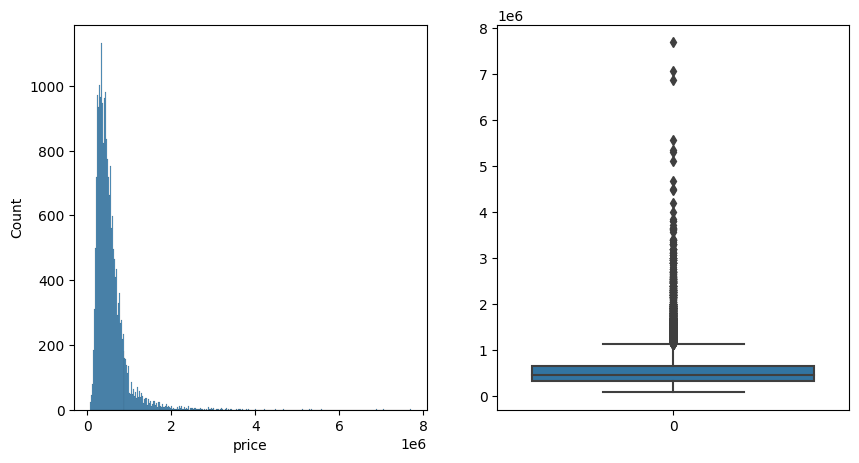

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.histplot(df['price'], ax=ax1)
sns.boxplot(df['price'], ax=ax2)

{'whiskers': [<matplotlib.lines.Line2D at 0x135c62150>,
 'caps': [<matplotlib.lines.Line2D at 0x135c63350>,
 'boxes': [<matplotlib.lines.Line2D at 0x135c61890>],
 'medians': [<matplotlib.lines.Line2D at 0x135c6c490>],
 'fliers': [<matplotlib.lines.Line2D at 0x135b19750>],
 'means': []}

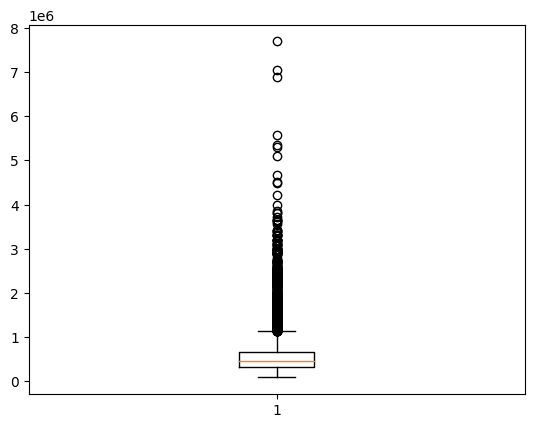

In [38]:
#plt.hist(x='price', data=df)
plt.boxplot(x='price', data=df)

In [39]:
mass_market = df[df['price'] <1100000]

In [41]:
luxury = df[df['price'] >= 1100000]

<Axes: >

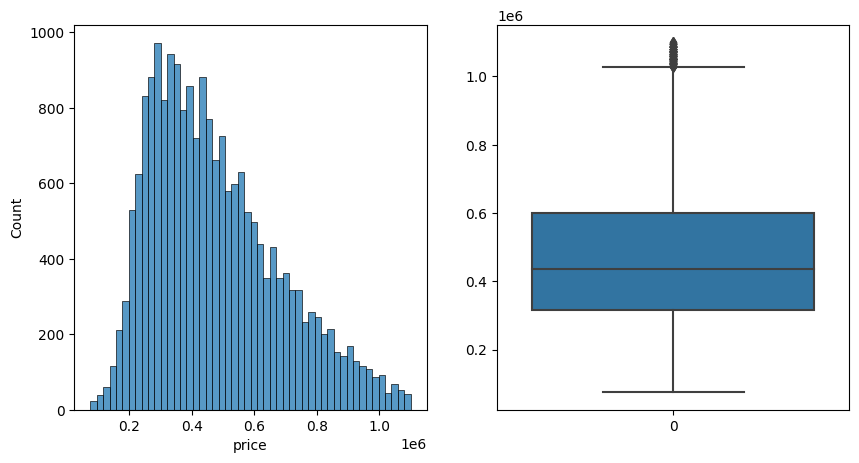

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.histplot(mass_market['price'], ax=ax1)
sns.boxplot(mass_market['price'], ax=ax2)

In [44]:
mass_market.groupby('bedrooms')['price'].count() / len(mass_market)

bedrooms
0    0.00
1    0.01
2    0.13
3    0.47
4    0.31
5    0.06
6    0.01
7    0.00
8    0.00
9    0.00
10   0.00
11   0.00
Name: price, dtype: float64

In [45]:
mm2 = mass_market[mass_market['bedrooms'].isin([3,4])]

<Axes: >

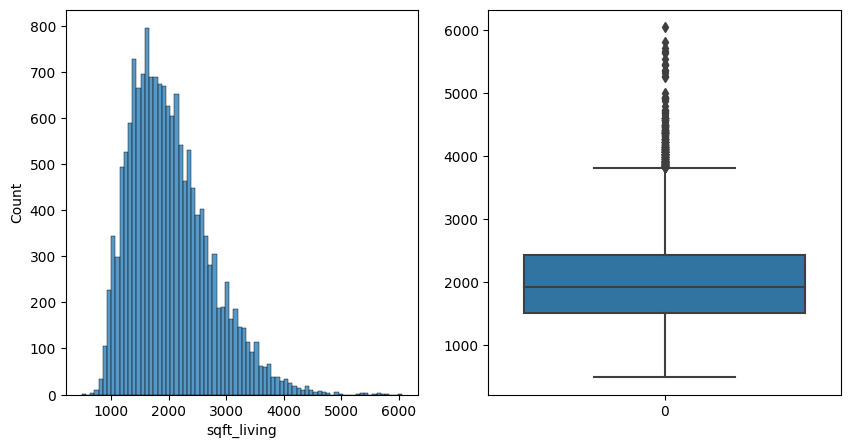

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.histplot(mm2['sqft_living'], ax=ax1)
sns.boxplot(mm2['sqft_living'], ax=ax2)

In [48]:
mm3 = mm2[mm2['sqft_living'] <= 3900]

<Axes: >

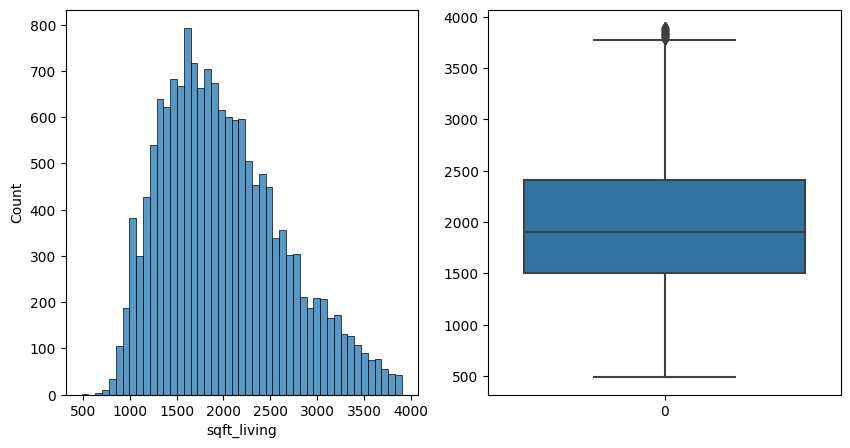

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.histplot(mm3['sqft_living'], ax=ax1)
sns.boxplot(mm3['sqft_living'], ax=ax2)

In [50]:
mm3.groupby('grade')['price'].count()

grade
4        1
5       83
6     1086
7     7077
8     4883
9     1884
10     563
11      66
Name: price, dtype: int64

In [51]:
mm3.groupby('waterfront')['price'].count()

waterfront
0    15613
1       30
Name: price, dtype: int64

In [52]:
mm3.groupby('view')['price'].count()

view
0    14522
1      194
2      578
3      262
4       87
Name: price, dtype: int64

<Axes: xlabel='sqft_living', ylabel='price'>

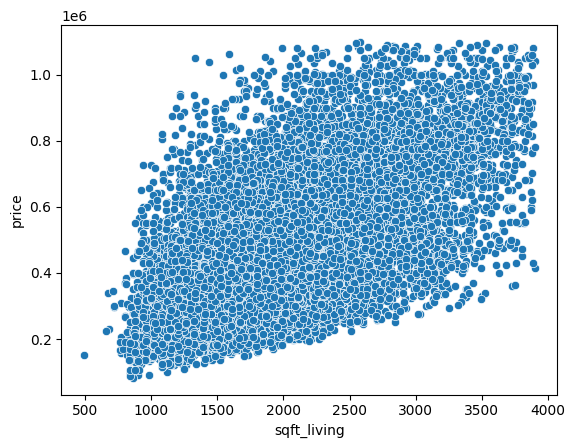

In [54]:
# understand relationship between sqft and price
sns.scatterplot(x='sqft_living', y='price', data=mm3)

<Axes: xlabel='sqft_living', ylabel='price'>

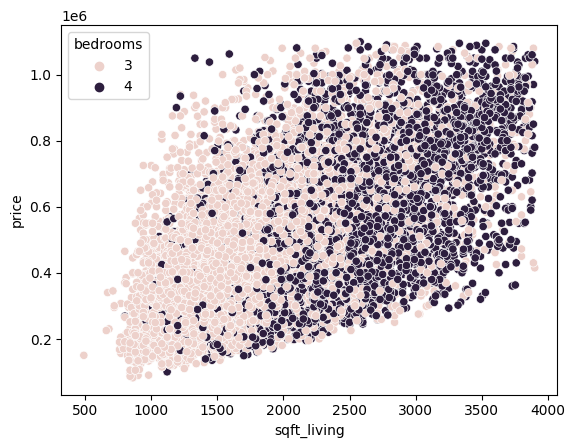

In [55]:
# understand relationship between sqft and price
sns.scatterplot(x='sqft_living', y='price', data=mm3, hue = 'bedrooms')

<Axes: xlabel='sqft_living', ylabel='price'>

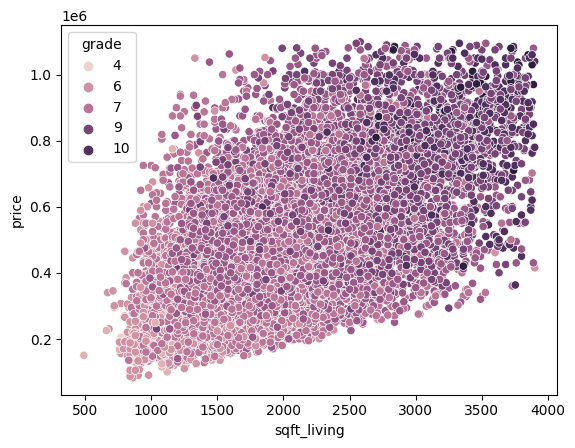

In [56]:
# understand relationship between sqft and price
sns.scatterplot(x='sqft_living', y='price', data=mm3, hue = 'grade')

<Axes: xlabel='grade', ylabel='price'>

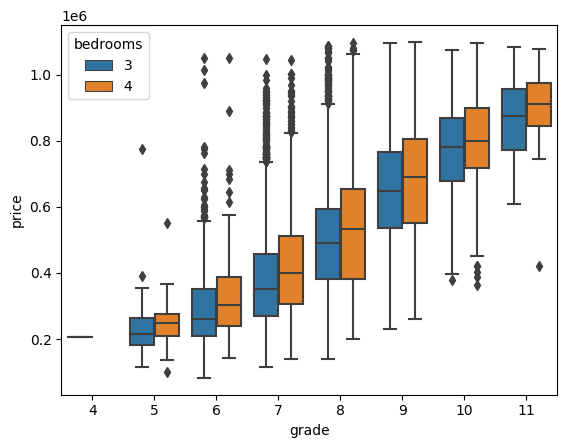

In [58]:
sns.boxplot(x = mm3['grade'], y = mm3['price'], hue = mm3['bedrooms'])

<Axes: xlabel='bedrooms', ylabel='price'>

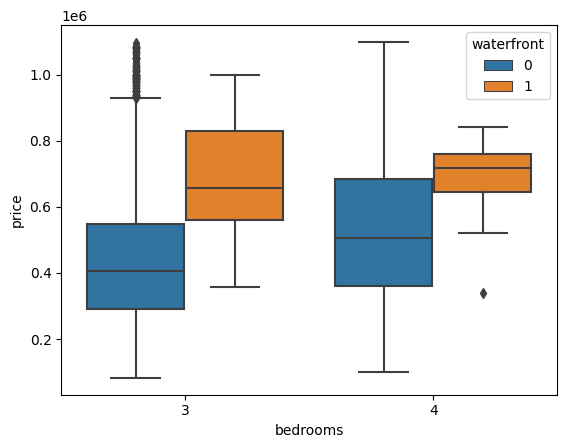

In [60]:
sns.boxplot(x = mm3['bedrooms'], y = mm3['price'], hue=mm3['waterfront'])

<Axes: xlabel='bathrooms', ylabel='price'>

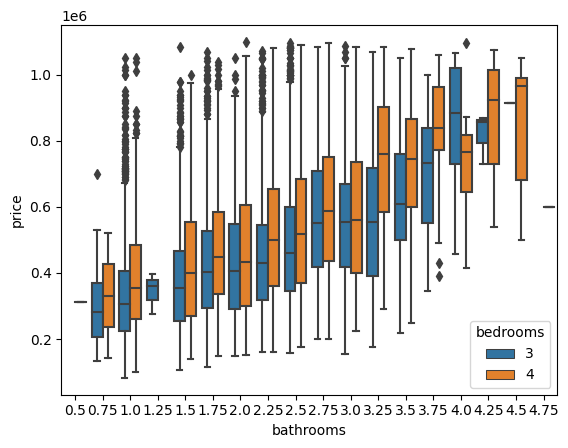

In [62]:
sns.boxplot(x = mm3['bathrooms'], y = mm3['price'], hue=mm3['bedrooms'])
